In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.ml.feature import *
from pyspark.sql.window import Window 
import matplotlib as mpl
from matplotlib import pyplot as plt

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [2]:
df_data = spark.read.format("csv") \
.option("header", "true") \
.option("infer_schema","true")\
.option("first_row_is_header","true")\
.load(r"C:\Users\myste\Documents\MSCS\Spring 2020\Big Data\nyc311-2010\311_preprocessed\*.csv")
df_data.createOrReplaceTempView("df_data")
df_data.show()

+--------------------+--------------------+--------------------+--------------------+-------------------+------------+---------------+------+----------------------+------------------------------+---------+------------------+------------------+---------------------+----------------------+--------------------+--------------------+--------------------+---------------------+
|        Created Date|         Closed Date|      Complaint Type|          Descriptor|      Location Type|Incident Zip|           City|Status|Resolution Description|Resolution Action Updated Date|  Borough|          Latitude|         Longitude|Complaint_Type_Groups|Resolution_Type_Groups|Location_Type_Groups|Resolution_Time_Secs|Resolution_Time_Mins|Resolution_Time_Hours|
+--------------------+--------------------+--------------------+--------------------+-------------------+------------+---------------+------+----------------------+------------------------------+---------+------------------+------------------+---------

In [3]:
df_data.describe

<bound method DataFrame.describe of DataFrame[Created Date: string, Closed Date: string, Complaint Type: string, Descriptor: string, Location Type: string, Incident Zip: string, City: string, Status: string, Resolution Description: string, Resolution Action Updated Date: string, Borough: string, Latitude: string, Longitude: string, Complaint_Type_Groups: string, Resolution_Type_Groups: string, Location_Type_Groups: string, Resolution_Time_Secs: string, Resolution_Time_Mins: string, Resolution_Time_Hours: string]>

In [5]:
complaint_counts = df_data.groupBy("Complaint_Type_Groups").count().orderBy("count",ascending=False)
complaint_counts.show()

+---------------------+------+
|Complaint_Type_Groups| count|
+---------------------+------+
|   Parking Conditions|191588|
|                Noise|118644|
|    Street Conditions| 31577|
|         Animal Abuse| 10503|
|              Traffic|  5169|
|  Disorderly Behavior|  2989|
+---------------------+------+



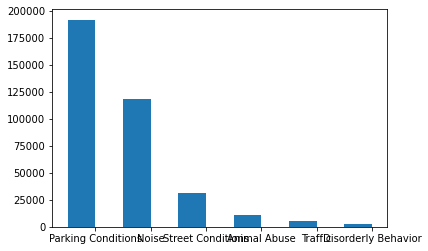

In [45]:
import matplotlib as mpl
from matplotlib import pyplot as plt

counts = complaint_counts.collect()
indexes = list(range(len(counts)))
values = [r['count'] for r in counts]
labels = [r['Complaint_Type_Groups'] for r in counts]
plt.bar(indexes, values, align='edge', width=0.5)
plt.xticks(labelidx, labels)
plt.show()

In [6]:
from pyspark.sql.window import Window

In [9]:
complaint_percentage = complaint_counts.withColumn("percent", col('count')*100/sum('count').over(Window.partitionBy())) 
complaint_percentage.orderBy('percent', ascending=False).show()

+---------------------+------+------------------+
|Complaint_Type_Groups| count|           percent|
+---------------------+------+------------------+
|   Parking Conditions|191588| 53.14949926484867|
|                Noise|118644| 32.91369600798957|
|    Street Conditions| 31577| 8.759952284517436|
|         Animal Abuse| 10503|2.9136960079895693|
|              Traffic|  5169|1.4339612172996365|
|  Disorderly Behavior|  2989|0.8291952173551197|
+---------------------+------+------------------+



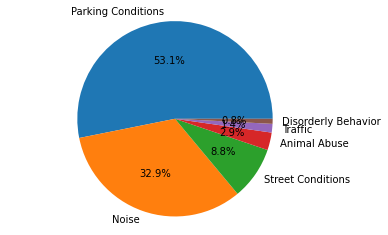

In [50]:
counts = complaint_percentage.collect()
indexes = list(range(len(counts)))
values = [r['percent'] for r in counts]
labels = [r['Complaint_Type_Groups'] for r in counts]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [11]:
borough_counts = df_data.groupBy("Borough").count().orderBy("count",ascending=False)
borough_counts.show()

+-------------+------+
|      Borough| count|
+-------------+------+
|     BROOKLYN|118634|
|       QUEENS|100680|
|    MANHATTAN| 76784|
|        BRONX| 49046|
|STATEN ISLAND| 15325|
|  Unspecified|     1|
+-------------+------+



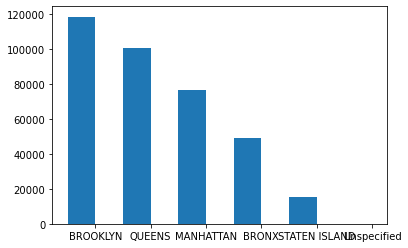

In [42]:
counts = borough_counts.collect()
indexes = list(range(len(counts)))
values = [r['count'] for r in counts]
labels = [r['Borough'] for r in counts]
plt.bar(indexes, values, align='edge', width=0.5)
plt.xticks(labelidx, labels)
plt.show()

In [51]:
borough_percentage = borough_counts.withColumn("percent", col('count')*100/sum('count').over(Window.partitionBy())) 
borough_percentage.orderBy('percent', ascending=False).show()

+-------------+------+--------------------+
|      Borough| count|             percent|
+-------------+------+--------------------+
|     BROOKLYN|118634|   32.91092185202652|
|       QUEENS|100680|  27.930202235969706|
|    MANHATTAN| 76784|  21.301079146669625|
|        BRONX| 49046|   13.60612533636641|
|STATEN ISLAND| 15325|   4.251394013371431|
|  Unspecified|     1|2.774155963048242...|
+-------------+------+--------------------+



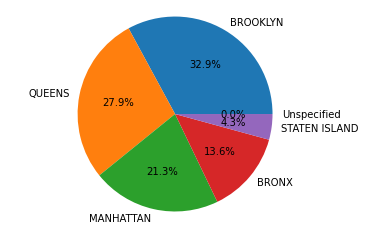

In [52]:
counts = borough_percentage.collect()
indexes = list(range(len(counts)))
values = [r['percent'] for r in counts]
labels = [r['Borough'] for r in counts]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [14]:
location_counts = df_data.groupBy("Location_Type_Groups").count().orderBy("count",ascending=False)
location_counts.show()

+--------------------+------+
|Location_Type_Groups| count|
+--------------------+------+
|     Street/Sidewalk|297936|
|          Commercial| 25044|
| Club/Bar/Restaurant| 21332|
|         Residential|  9624|
|     Park/Playground|  4743|
|    House of Worship|  1059|
|Roadway/Highway/B...|   309|
|         Parking Lot|   261|
|                null|   122|
|      Subway Station|    40|
+--------------------+------+



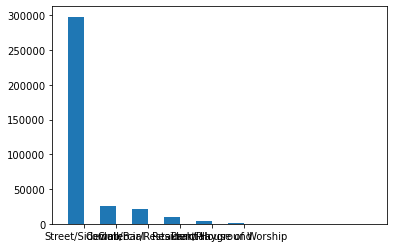

In [44]:
counts = location_counts.collect()
indexes = list(range(len(counts)))
values = [r['count'] for r in counts]
labels = [r['Location_Type_Groups'] for r in counts]
plt.bar(indexes, values, align='edge', width=0.5)
plt.xticks(labelidx, labels)
plt.show()

In [53]:
location_percentage = location_counts.withColumn("percent", col('count')*100/sum('count').over(Window.partitionBy())) 
location_percentage.orderBy('percent', ascending=False).show()

+--------------------+------+-------------------+
|Location_Type_Groups| count|            percent|
+--------------------+------+-------------------+
|     Street/Sidewalk|297936|  82.65209310067412|
|          Commercial| 25044|  6.947596193858018|
| Club/Bar/Restaurant| 21332|  5.917829500374511|
|         Residential|  9624| 2.6698476988376285|
|     Park/Playground|  4743| 1.3157821732737816|
|    House of Worship|  1059| 0.2937831164868089|
|Roadway/Highway/B...|   309| 0.0857214192581907|
|         Parking Lot|   261|0.07240547063555913|
|                null|   122|0.03384470274918856|
|      Subway Station|    40|0.01109662385219297|
+--------------------+------+-------------------+



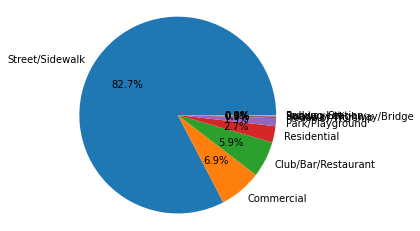

In [54]:
counts = location_percentage.collect()
indexes = list(range(len(counts)))
values = [r['percent'] for r in counts]
labels = [r['Location_Type_Groups'] for r in counts]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [17]:
noise = df_data.select("Complaint_Type_Groups", "Latitude", "Longitude")
noise = noise.filter("Complaint_Type_Groups = 'Noise'")
noise.show()

+---------------------+------------------+------------------+
|Complaint_Type_Groups|          Latitude|         Longitude|
+---------------------+------------------+------------------+
|                Noise| 40.86568153633767|-73.92350095571744|
|                Noise|40.845545043640215|-73.83358471831198|
|                Noise|40.679154133157326|-73.98342992763081|
|                Noise| 40.61655032892211|-73.93020153359745|
|                Noise| 40.80526715877265| -73.9533526205901|
|                Noise| 40.61478362623815|-73.93656784825214|
|                Noise|   40.826101709196|-73.94566339279595|
|                Noise|40.691599059545375|-73.98437881826075|
|                Noise| 40.68186974794423|-73.94937196628798|
|                Noise|40.691599059545375|-73.98437881826075|
|                Noise|40.714007352909874|-73.94171469793936|
|                Noise|40.752466784765815|-73.97026303855291|
|                Noise| 40.68186974794423|-73.94937196628798|
|       